In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-sales-data/car_prices.csv


In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [30]:
data = pd.read_csv("/kaggle/input/vehicle-sales-data/car_prices.csv")

In [31]:
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


# Size Of Data

In [32]:

data.shape

(558837, 16)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [34]:
data.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


# Overview Of Missing Values

<Axes: >

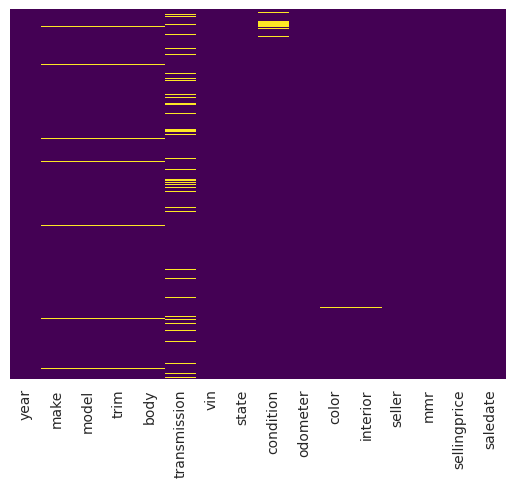

In [35]:
 sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

# With at least one row with missing value

In [36]:
missing_data = data[data.isna().any(axis = 1)]
missing_data.shape

(86512, 16)

In [37]:
percentage_missing = missing_data.shape[0]/data.shape[0]
print(f'{percentage_missing:.2f}')

0.15


# Count of number of missing value by each columns.

In [38]:
 missing_values = data[['make', 'model', 'trim', 'body','transmission','state','color','interior','condition']].isna().sum()
print(missing_values)

make            10301
model           10399
trim            10651
body            13195
transmission    65352
state               0
color             749
interior          749
condition       11820
dtype: int64


# Droppping all the null values except for transmission column. 

<Axes: >

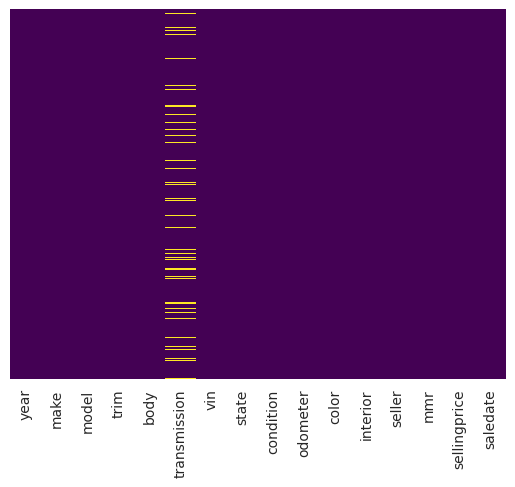

In [39]:
 
data.dropna(subset = ['make', 'model', 'trim', 'body', 'state', 'color', 'interior', 'condition'], inplace = True)
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [40]:
transmission_count = data['transmission'].value_counts()
transmission_count_df = pd.DataFrame(transmission_count.reset_index())
transmission_count_df.columns = ['transmission', 'count']
total_count= transmission_count_df['count'].sum()
automatic_count = transmission_count_df.loc[transmission_count_df['transmission'] == 'automatic', 'count'].values[0]
manual_count = transmission_count_df.loc[transmission_count_df['transmission'] == 'manual', 'count'].values[0]
automatic_percentage = automatic_count/total_count * 100 
manual_percentage = manual_count/total_count * 100 
print(total_count)
print(f'The percentage of automatic vehicles is:  {automatic_percentage: .2f}')
print(f'The percentage of manual vehicles is:  {manual_percentage: .2f}')



472357
The percentage of automatic vehicles is:   96.54
The percentage of manual vehicles is:   3.46


In [41]:
total_missing = data.transmission.isna().sum()

# Filling missing values with same proportion. 

In [42]:
# missing transmission only 
missing_transmission = data['transmission'].isnull()
num_automatic = int(total_missing * 0.96)
num_manual = total_missing - num_automatic
# creating numpy array with 96% automatic and 4% manual choices. 
choices = np.random.choice(['automatic', 'manual'], size = total_missing, p = [0.96, 0.04])
#replacing missing values with choices
data.loc[missing_transmission, 'transmission'] = choices
# making sure there are no missing rows for transmission column. 
print(data['transmission'].isnull().sum())

0


# Making sure there are no any missing data any columns

<Axes: >

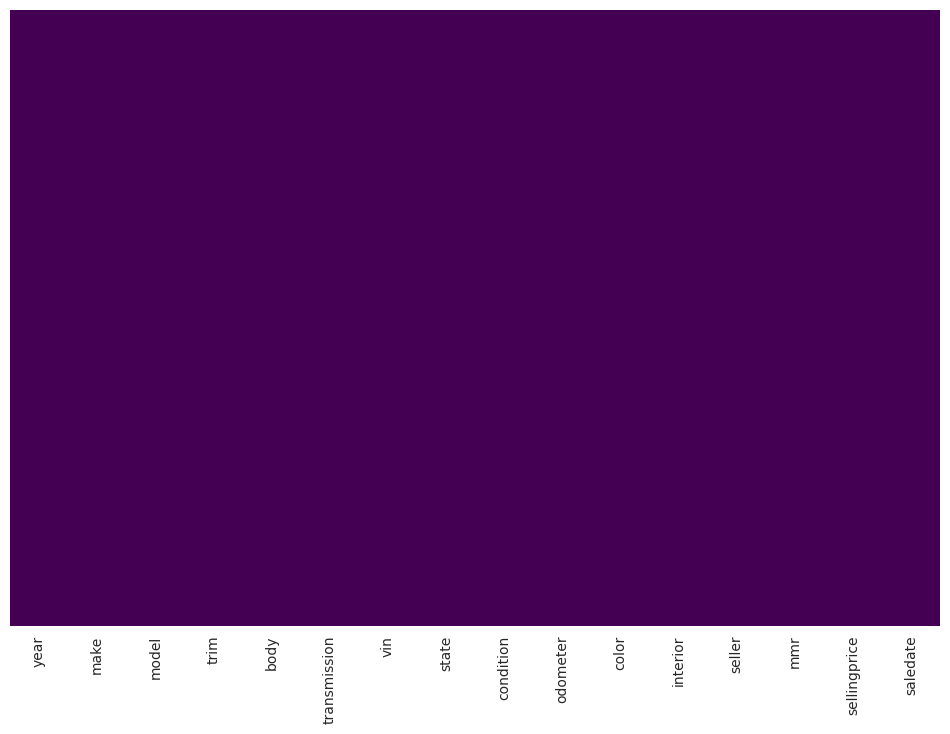

In [43]:

plt.figure(figsize = (12,8))
sns.heatmap(data.isnull(), yticklabels = False, cmap = "viridis", cbar = False)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533685 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          533685 non-null  int64  
 1   make          533685 non-null  object 
 2   model         533685 non-null  object 
 3   trim          533685 non-null  object 
 4   body          533685 non-null  object 
 5   transmission  533685 non-null  object 
 6   vin           533685 non-null  object 
 7   state         533685 non-null  object 
 8   condition     533685 non-null  float64
 9   odometer      533660 non-null  float64
 10  color         533685 non-null  object 
 11  interior      533685 non-null  object 
 12  seller        533685 non-null  object 
 13  mmr           533673 non-null  float64
 14  sellingprice  533673 non-null  float64
 15  saledate      533673 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 69.2+ MB


1990
2015


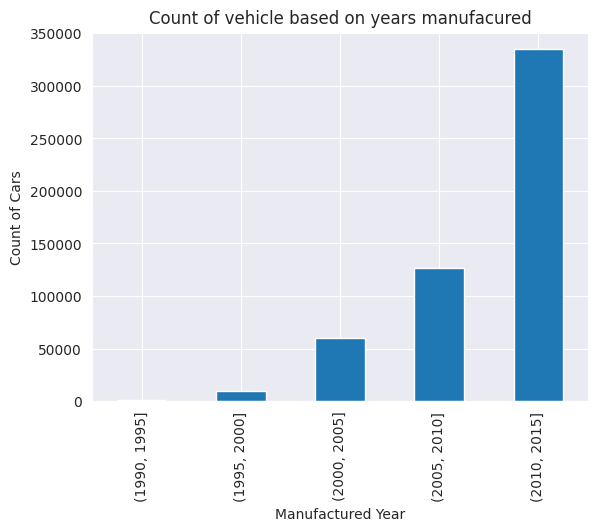

In [45]:
import warnings 
warnings.filterwarnings('ignore', category = FutureWarning)
# exploring the vehicles based on years they were manufactured 
min_year = data['year'].min()
max_year= data['year'].max()
print(min_year)
print(max_year)
sns.set_style('darkgrid')
#creating intervals of 5 years. 
bins = [min_year, 1995, 2000, 2005, 2010, max_year]
car_years = data.groupby(pd.cut(data['year'], bins = bins)).size()
car_years.plot(kind = 'bar')
plt.xlabel('Manufactured Year')
plt.ylabel('Count of Cars')
plt.title('Count of vehicle based on years manufacured')
plt.show()


# Distribution based on transmission type 


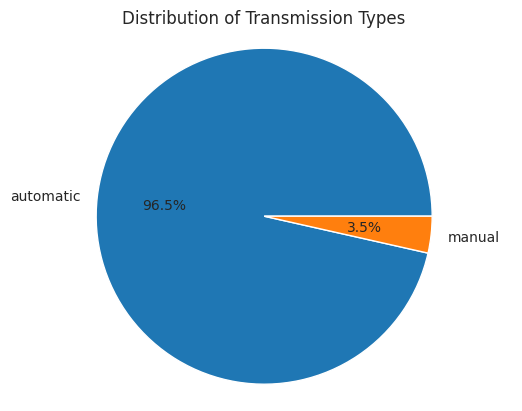

In [46]:
sns.set_style('darkgrid')
car_transmission = data['transmission'].value_counts()
plt.pie(car_transmission, labels = car_transmission.index, autopct='%1.1f%%')
plt.title('Distribution of Transmission Types')
plt.axis('equal') 
plt.show()

# Counting number of vehicles based on state. 

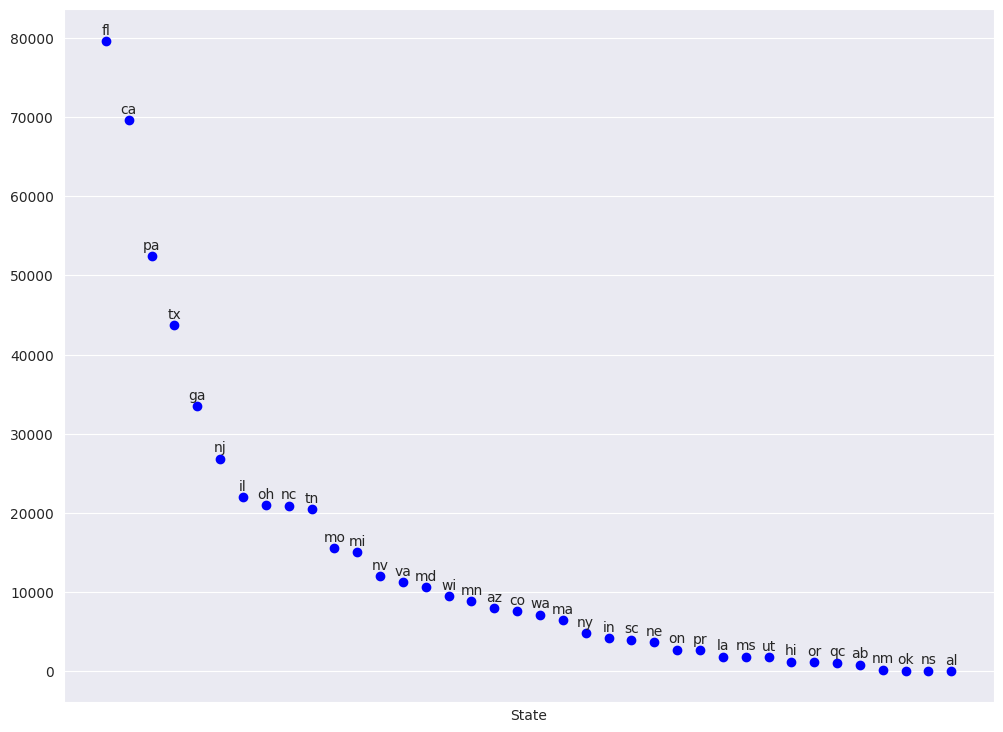

In [47]:

plt.figure(figsize = (12, 9))
car_state = data['state'].value_counts()
plt.xlabel("State")
plt.xticks([])
plt.scatter( car_state.index, car_state.values, color = 'blue')
#placing text on top of count variable inside the plt 
for i, count in enumerate(car_state.values): 
    plt.text(car_state.index[i], count + 500, car_state.index[i][:2], ha='center', va='bottom', fontsize=10)
plt.show()

# Vehicles count based on condition 

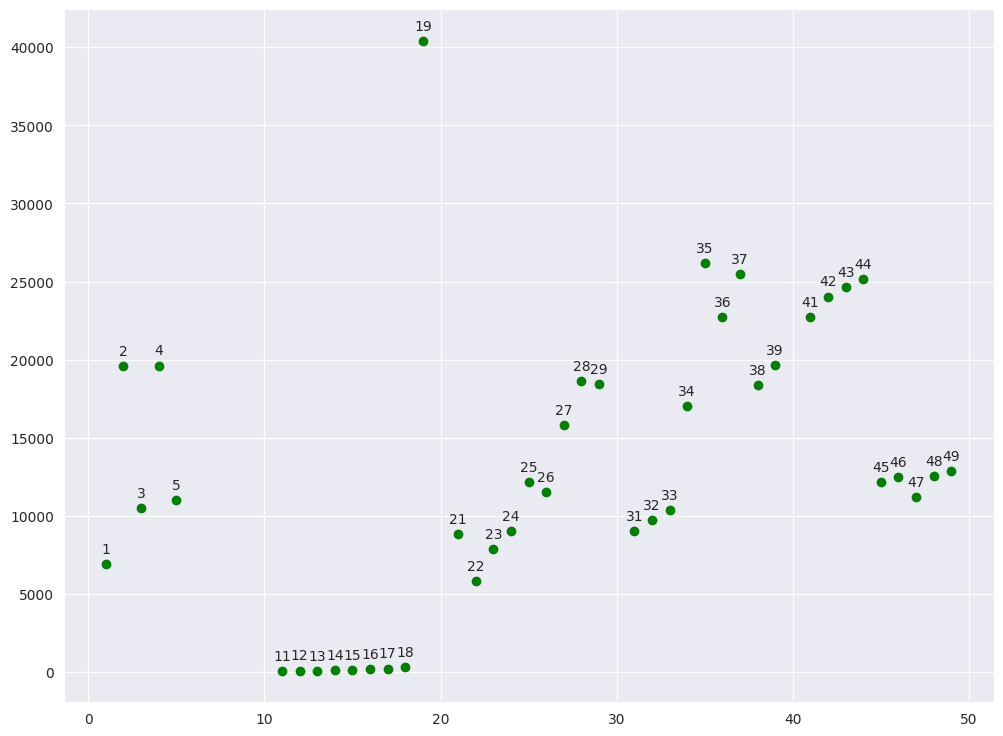

In [48]:

vehicle_counts = data['condition'].value_counts()
plt.figure(figsize= (12,9))
plt.scatter(vehicle_counts.index, vehicle_counts.values, color = 'green')
for i, count in enumerate(vehicle_counts.values): 
    plt.text(vehicle_counts.index[i],count + 500, f"{vehicle_counts.index[i]:.0f}", ha = 'center', va = 'bottom', fontsize = 10 )
plt.show()

# Vehicle counts based on odometer reading

<Axes: xlabel='odometer', ylabel='Count'>

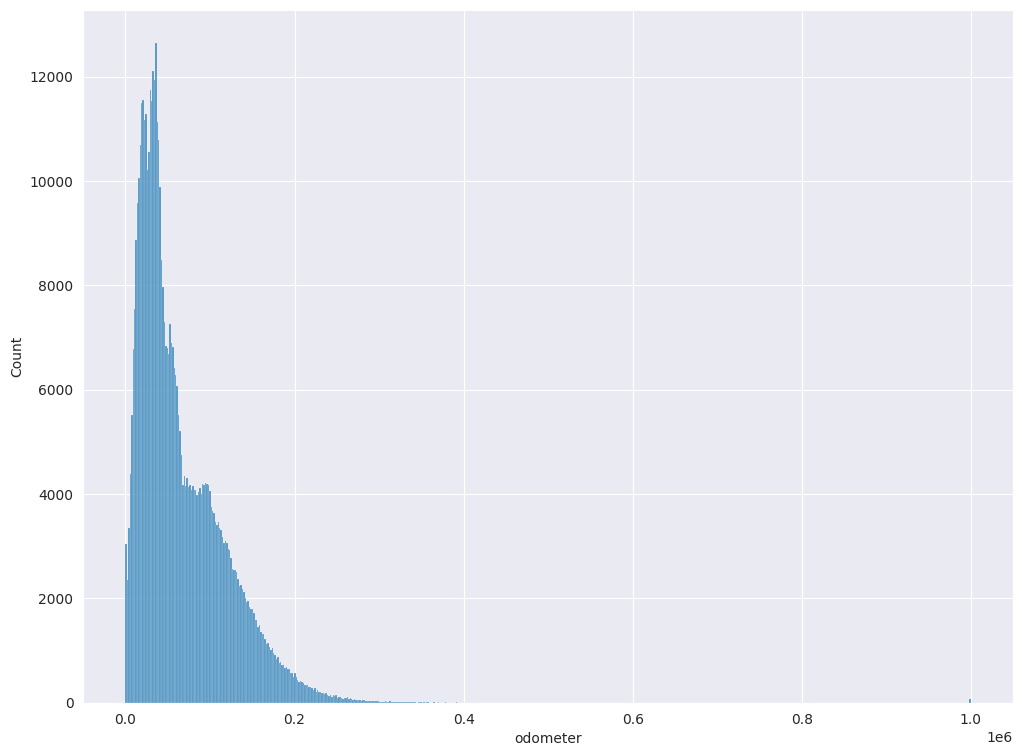

In [49]:

plt.figure(figsize = (12,9))
data.odometer.max()
sns.histplot(data, x = data.odometer)

# We have a big outlier on odometer reading. Lets eliminate that

In [50]:
data.odometer.max()

999999.0

# Eliminating odometer reading which has values more than 500000.

In [51]:
data.drop(data[data.odometer>500000].index, axis = 0, inplace = True)
data.odometer.max()

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


495757.0

# Vehicle counts based on odometer reading

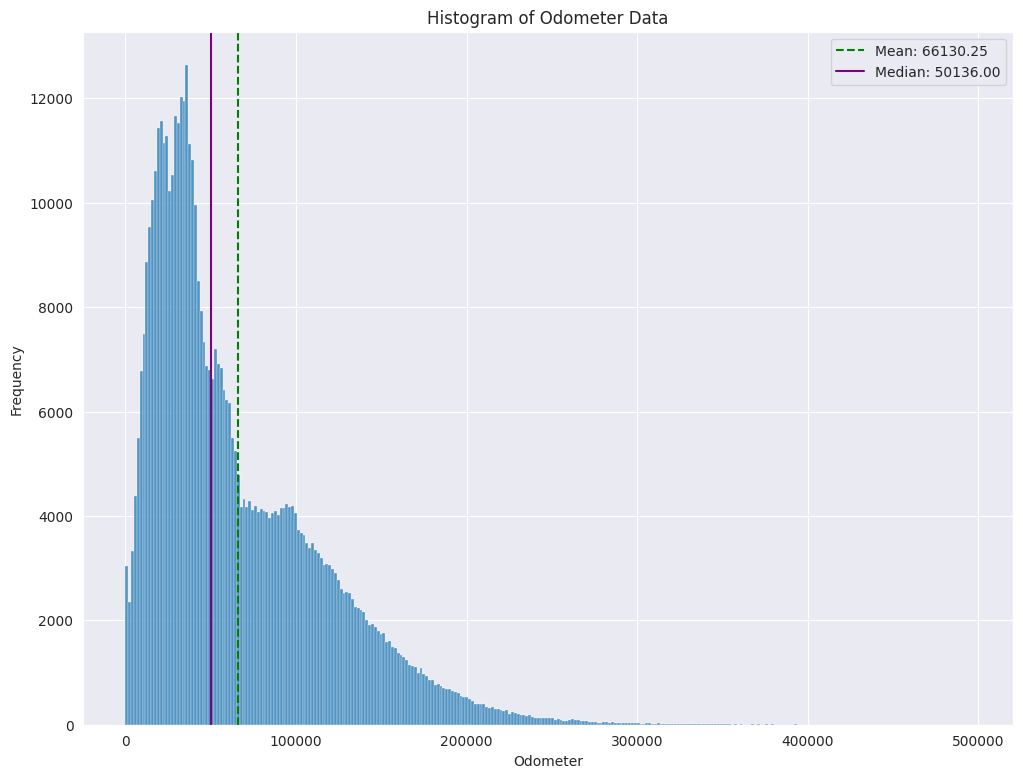

In [52]:

plt.figure(figsize = (12,9))
data.odometer.max()
sns.histplot(data, x = data.odometer)
mean = data.odometer.mean()
median = data.odometer.median()
plt.axvline(x = mean, color = 'green', linestyle = '--', label = f'Mean: {mean:.2f}')
plt.axvline(x = median, color = 'purple', linestyle = "-", label = f'Median:{median: .2f}')
plt.legend()
plt.title('Histogram of Odometer Data')
plt.xlabel("Odometer")
plt.ylabel('Frequency')
plt.show()

In [53]:
vehicle_color = data['color'].value_counts()
print(vehicle_color.head)



<bound method NDFrame.head of color
black        106593
white        101828
gray          79999
silver        79506
blue          48523
red           41633
—             24371
gold          10472
green         10357
beige          8592
burgundy       8500
brown          6493
orange         1940
purple         1477
off-white      1398
yellow         1196
charcoal        464
turquoise       215
pink             41
lime             14
Name: count, dtype: int64>
